In [0]:
# GPU로 바꾸기

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
### code part1 - word2vec 모델 저장하기

#Word2Vec embedding
import re
import nltk
from gensim.models import Word2Vec
import os
import numpy as np
import json
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
from keras.optimizers import SGD


# token list 읽기 - train data 준비
from keras_preprocessing.text import Tokenizer

result = []
train_data = []
with open('/content/drive/My Drive/temp_상아/tempe_token_ad.txt', 'rt', encoding='UTF-8') as mf:
  while True:
    temp = mf.readline()
    if not temp:
      break
    if temp == '[\n':
      continue
    elif temp == ']\n':
      train_data.append(result)
      result = []
      continue
    else:
      l = len(temp)
      word = temp[0:l-1]
      result.append(word)

# test data 준비
result1 = []
test_data = []
with open('/content/drive/My Drive/temp_상아/vegas_token_ad.txt', 'rt', encoding='UTF-8') as mf:
  while True:
    temp1 = mf.readline()
    if not temp1:
      break
    if temp1 == '[\n':
      continue
    elif temp1 == ']\n':
      test_data.append(result1)
      result1 = []
      continue
    else:
      l = len(temp1)
      word1 = temp1[0:l-1]
      result1.append(word1)

# label 준비
train_label = []
with open('/content/drive/My Drive/dataset/전처리 전 json/tempe_3000.json', 'rt', -1, encoding='UTF-8') as f:
    for line in f:
        lineobj = json.loads(line)
        star = lineobj['stars']
        if star >= 4:
            train_label.append('2')
        elif star == 3:
            train_label.append('1')
        else:
            train_label.append('0')
            
train_label = np.array(train_label)
train_label = np_utils.to_categorical(train_label, 3)

# test label 준비
test_label=[]
with open('/content/drive/My Drive/dataset/전처리 전 json/vegas_3000.json', 'rt', -1, encoding='UTF-8') as f:
    for line in f:
        lineobj = json.loads(line)
        star = lineobj['stars']
        if star >= 4:
            test_label.append('2')
        elif star == 3:
            test_label.append('1')
        else:
            test_label.append('0')
            
test_label = np.array(test_label)     
test_label = np_utils.to_categorical(test_label, 3)


"""
max_length = max(len(train_data))
print(max_length)
""" 

"""
size = 워드 벡터의 특징 값. 즉, 임베딩 된 벡터의 차원.
window = 컨텍스트 윈도우 크기
min_count = 단어 최소 빈도 수 제한 (빈도가 적은 단어들은 학습하지 않는다.)
workers = 학습을 위한 프로세스 수
sg = 0은 CBOW, 1은 Skip-gram.
"""

embedding_dim = 100
#train word2vec model
embedding_model = Word2Vec(sentences=train_data, size=embedding_dim, min_count=3, window=4, iter=200, workers=4, sg=0) #size = embedding_dim = 80

# save model
filename = '/content/drive/My Drive/temp_상아/word2vecmodel/word2vec_model.txt'
embedding_model.wv.save_word2vec_format(filename, binary=False)

#vocab size
words = list(embedding_model.wv.vocab)
print("Vocabulary size: %d" % len(words))
print(words)

a=embedding_model.wv.most_similar("delicious", topn=300)
print(a)





Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Vocabulary size: 2750
['absolutely', 'love', 'many', 'never', 'fails', 'impress', 'unreal', 'amazing', 'pretty', 'much', 'best', 'delicious', 'wish', 'closer', 'reasonable', 'great', 'not', 'ask', 'else', 'grew', 'lived', 'became', 'always', 'brought', 'green', 'outstanding', 'believe', 'perfect', 'right', 'cook', 'try', 'shocked', 'opted', 'remove', 'middle', 'double', 'cheese', 'crispy', 'fresh', 'also', 'loved', 'better', 'fav', 'indian', 'triple', 'tried', 'tempe', 'several', 'really', 'glad', 'discovered', 'funny', 'see', 'friend', 'big', 'similar', 'super', 'soon', 'hear', 'get', 'cute', 'little', 'casual', 'fast', 'friendly', 'need', 'different', 'come', 'next', 'but', 'standard', 'nice', 'suggest', 'oh', 'good', 'legit', 'literally', 'real', 'think', 'drank', 'darn', 'east', 'open', 'wait', 'go', 'back', 'recommend', 'coming', 'anymore', 'based', 'rather', 'skip', 'delish', 'buffalo', 'fab', 'soft', 'introduced', 'awesome', 'interesting', 'got', 'orange', 'red', 'felt', 'eating

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
###code part2 - 모델 사용하기
import os
#test - train_data에 있는 중복되지 않은 모든 단어의 개수 : 10636 => 왜 word2vec 단어 개수와 다른지? : mincount=5
all_words = []
for sent in train_data:
  for word in sent:
    all_words.append(word)
#print(all_words)
unique_words = set(all_words)
print(len(unique_words)) 


# use pre-trained Embedding
#import os
embeddings_index = {}
file = open(os.path.join('', '/content/drive/My Drive/temp_상아/word2vecmodel/word2vec_model.txt'), encoding="utf-8")
for line in file:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:])
  embeddings_index[word] = coefs
file.close()

# max_length - train data
max_length = max([len(sent) for sent in train_data])
print('max_length of review(train) : ', max_length)

# max_length - test data
max_length_test = max([len(sent) for sent in test_data])
print('max_length of review(test) : ', max_length_test)

# vec - train data
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(train_data)
sequences = tokenizer_obj.texts_to_sequences(train_data)

# vec - test data
tokenizer_obj_test = Tokenizer()
tokenizer_obj_test.fit_on_texts(test_data)
sequences_test = tokenizer_obj_test.texts_to_sequences(test_data)

# pad_sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

review_pad = pad_sequences(sequences, maxlen=max_length_test, padding = 'post')         # test data max가 더 커서 그 값으로 train, test 둘다 패딩
sentiment = train_label

print('Shape of review tensor:', review_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

num_words = len(word_index)+1
embedding_dim = 100
embedding_matrix = np.zeros((num_words, embedding_dim))

for word, i in word_index.items():
  if i > num_words:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None :
    # words not found in embedding index will be all-zeros
    embedding_matrix[i] = embedding_vector

print('train data word size : ',num_words)

# pad_sequences_test
word_index_test = tokenizer_obj_test.word_index
print('Found %s unique tokens(test).' % len(word_index_test))

review_pad_test = pad_sequences(sequences_test, maxlen=max_length_test, padding = 'post')   # test data max가 더 커서 그 값으로 train, test 둘다 패딩
sentiment_test = test_label

print('Shape of review tensor(test):', review_pad_test.shape)
print('Shape of sentiment tensor(test):', sentiment_test.shape)

num_words_test = len(word_index_test)+1
embedding_matrix_test = np.zeros((num_words_test, embedding_dim))

for word, i in word_index_test.items():
  if i > num_words_test:
    continue
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None :
    # words not found in embedding index will be all-zeros
    embedding_matrix_test[i] = embedding_vector

print('test data word size : ',num_words_test)

7454
max_length of review(train) :  252
max_length of review(test) :  255
Found 7454 unique tokens.
Shape of review tensor: (3000, 255)
Shape of sentiment tensor: (3000, 3)
train data word size :  7455
Found 7966 unique tokens(test).
Shape of review tensor(test): (3000, 255)
Shape of sentiment tensor(test): (3000, 3)
test data word size :  7967


In [0]:
### code part3 - 훈련 모델

from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Dense, Activation, Flatten, Dropout, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.initializers import Constant

#model.reset_states()
# define model
# In the below code, the only change from previous model is using the embedding_matrix as input to the Embedding layer and setting trainable = False, since the embedding is already learned.

model = Sequential()
model.add(Embedding(num_words, embedding_dim, embeddings_initializer=Constant(embedding_matrix), input_length=max_length_test, trainable = False))    #test data max length로 맞춤
#model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
#model.add(Dense(3, activation='sigmoid'))
model.add(Conv1D(filters=50, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=50, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=100, kernel_size=5, activation='relu'))
model.add(Conv1D(filters=100, kernel_size=5, activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

# try using different optimizers and different optimizer configs
sgd = SGD(lr=0.01, nesterov=True, decay=1e-6, momentum=0.9)
#model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print(model.summary())

W0827 11:19:05.843150 140411100751744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 11:19:05.889885 140411100751744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 11:19:05.918897 140411100751744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0827 11:19:05.956782 140411100751744 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0827 11:19:06.038666 140411100751744 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 255, 100)          745500    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 251, 50)           25050     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 125, 50)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 121, 50)           12550     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 60, 50)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 100)           25100     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 28, 100)           0         
__________

In [0]:
# padding이 리뷰 앞에 되어있음....괜찮은건가.....
print(review_pad_test)
print(len(review_pad_test[100]))
print(review_pad_test[0])

[[  36 4104  173 ...    0    0    0]
 [ 580 2944 1463 ...    0    0    0]
 [2946 4110 2947 ...    0    0    0]
 ...
 [  10    6  298 ...    0    0    0]
 [ 553    5    5 ...    0    0    0]
 [   2  695  297 ...    0    0    0]]
255
[  36 4104  173  789  250 4105    9  125  118   14   35  433  445   17
  234    3  174  100  264  304 4106   17  391  104  715 2942 2014    4
   48   10 1115  223  189  278 1058  855   77 1462 4107 1793  485    1
   32    5 1793   32 1794  485 4108   68  131 1058   29  565   39  183
  224   56   41  646   85   39  316  628    2   15   29    1   25  179
    4   64  392    1   14    1    1  131  125  335   21   24  993   76
  445   65  145 2943    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0   

In [0]:
validation_split = 0.2

idx = np.arange(review_pad.shape[0])
np.random.shuffle(idx)
review_pad = review_pad[idx]
sentiment = sentiment[idx]
num_validation_samples = int(validation_split * review_pad.shape[0])

x_train_pad = review_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
x_valid_pad = review_pad[-num_validation_samples:]
y_valid = sentiment[-num_validation_samples:]

x_test_pad = review_pad_test
y_test = sentiment_test

print('Shape of x_train_pad tensor:', x_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of x_valid_pad tensor:', x_valid_pad.shape)
print('Shape of y_valid tensor:', y_valid.shape)

print('Shape of x_test_pad tensor:', x_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of x_train_pad tensor: (2400, 255)
Shape of y_train tensor: (2400, 3)
Shape of x_valid_pad tensor: (600, 255)
Shape of y_valid tensor: (600, 3)
Shape of x_test_pad tensor: (3000, 255)
Shape of y_test tensor: (3000, 3)


In [0]:
result = model.fit(x_train_pad, y_train, batch_size=100, epochs=15, validation_data=(x_valid_pad, y_valid), verbose=1)

Train on 2400 samples, validate on 600 samples
Epoch 1/15
2400/2400 [==============================] - 1s 262us/step - loss: 0.0085 - acc: 0.9971 - val_loss: 2.8874 - val_acc: 0.6583
Epoch 2/15
2400/2400 [==============================] - 1s 209us/step - loss: 0.0059 - acc: 0.9979 - val_loss: 2.9483 - val_acc: 0.6550
Epoch 3/15
2400/2400 [==============================] - 1s 212us/step - loss: 0.0019 - acc: 0.9996 - val_loss: 2.8581 - val_acc: 0.6317
Epoch 4/15
2400/2400 [==============================] - 1s 208us/step - loss: 0.0073 - acc: 0.9983 - val_loss: 2.9507 - val_acc: 0.6583
Epoch 5/15
2400/2400 [==============================] - 1s 210us/step - loss: 0.0247 - acc: 0.9929 - val_loss: 3.1687 - val_acc: 0.6317
Epoch 6/15
2400/2400 [==============================] - 1s 209us/step - loss: 0.0187 - acc: 0.9938 - val_loss: 2.8020 - val_acc: 0.6250
Epoch 7/15
2400/2400 [==============================] - 1s 211us/step - loss: 0.0189 - acc: 0.9942 - val_loss: 2.8367 - val_acc: 0.6283
E

In [0]:
# 참고 - https://towardsdatascience.com/machine-learning-word-embedding-sentiment-classification-using-keras-b83c28087456

In [0]:
# save model
model.save('/content/drive/My Drive/temp_상아/kerasmodel/model.h5')
print('save model...')

save model...


3000/3000 [==============================] - 1s 235us/step
Accuracy: 34.500000


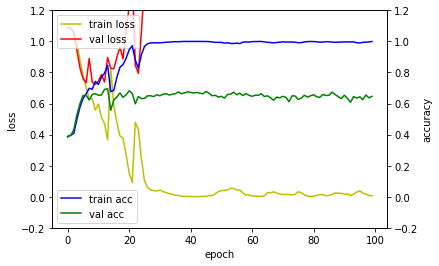

In [0]:
#loss, accuracy = model.evaluate(padded_sentences_test, test_label, verbose=1)
loss, accuracy = model.evaluate(x_test_pad, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(result.history['loss'], 'y', label='train loss')
loss_ax.plot(result.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([-0.2, 1.2])

acc_ax.plot(result.history['acc'], 'b', label='train acc')
acc_ax.plot(result.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylim([-0.2, 1.2])

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [0]:
counta=0
countb=0
countc=0

for i in y_train:
  print(i)
  print(i[0])
  print(i[1])
  print(i[2])
  if i[0] == 1.0:
    counta = counta + 1
  elif i[1] == 1.0:
    countb == countb+1
  elif i[2] == 1.0:
    countc == countc+1
  break
  
print(counta,', ', countb,',', countc)

[0. 0. 1.]
0.0
0.0
1.0
0 ,  0 , 0


In [0]:
print(y_train[3:6])

print(x_train_pad[3:6])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
[[ 238   18   64   47    1  224  170  514    1   56    1   48   22   62
    31  117   41    1   15 5685 1305   39    1  106   54  399    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0 

In [0]:


# keras model remove 맨 위에 추가해야 함.
# 단어 임베딩 제대로 된건지 확인하기. 왜 review_pad가 벡터로 임베딩되지 않고 정수로 임베딩됐는지 / 워드벡터가 어디에 쓰였는지/ 같은 수는 word2vec의 유사어인지 확인

### 할 일(선택사항)
1. 전처리 추가
2. word2vec에 단어 사전 같은 것도 함께 학습시킴 / 30000개 정도처럼 엄청 많은 데이터 학습시키기 :: word2vec 단어 사전이 작아서 정확도가 낮은지?
3. 품사 중에서 형용사, 부사, 동사만 빼서 사용하기  :: 쓸데없는 명사가 많아서 그런지?
4. 패딩할 때 제일 짧은 리뷰길이(이게 너무 짧으면 평균 길이)로 패딩해보기
5. max 길이보다 짧은 문장들은 같은 문장 계속 반복해서 max랑 길이 맞춰보기
6. 유사한 단어 리스트로 뽑아서(여러, 어떤 단어들 뽑을건지는 토픽모델링 사용?) 유사한 단어는 같은 label로 치환하는 방법
7. CNN 모델 개선

8. good bad로만 나누는 이진분류기

- 학습과 검증에 비해 test 데이터의 정확도가 낮은 이유
- 그렇다고 검증 정확도가 아주 높지도 않음

=> 애초에 데이터가 구분이 잘 되는 숫자들로 임베딩되지 않은 것?

word 간의 유사도 구분이 들어간건지?
